<a href="https://colab.research.google.com/github/neelkanthrawat/GNN-exercises/blob/main/Project/AE_mnist_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AE for style transfer via CINN

Training a common AE for the coloured mnist and uncoloured mnist dataset

Let's first generate the coloured MNIST dataset

In [5]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.randint(0,256,3)

array([120, 153,  86])

### 1. Colored images (combination of R,G,B (and not just one of R,G,B))

(For coloring the digits only either red or green or blue, go to section 2 in the notebook below)

In [4]:
# Function to randomly colorize MNIST dataset
def random_colorize_mnist(X):
    colored_X = np.zeros((X.shape[0], X.shape[1], X.shape[2], 3), dtype=np.uint8)

    for i in range(X.shape[0]):
        img = X[i]

        # Generate random color
        color = np.random.randint(0, 256, 3)

        # Colorize the digits while keeping the background unchanged
        colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        colored_img[img > 0] = color
        colored_X[i] = colored_img

    return colored_X

In [ ]:
# Load MNIST training dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=ToTensor())
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()

# Load MNIST test dataset
test_dataset = MNIST(root='./data', train=False, download=True, transform=ToTensor())
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

In [7]:
# Colorize the training images
colored_X_train = random_colorize_mnist(X_train)

# Colorize the test images
colored_X_test = random_colorize_mnist(X_test)

In [8]:
# Function to plot colored MNIST dataset
def plotting_mnist_dataset(colored_X, title):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(colored_X[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

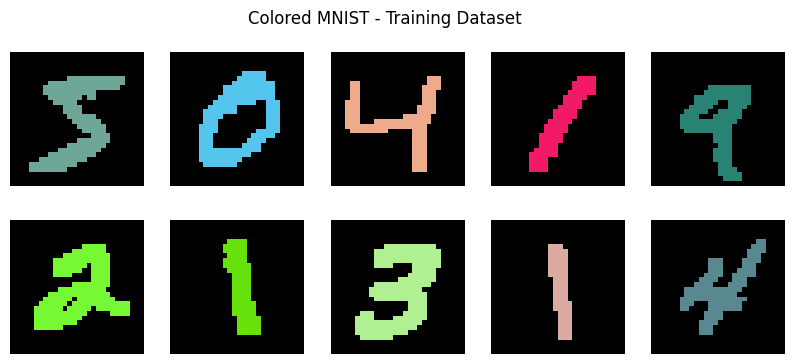

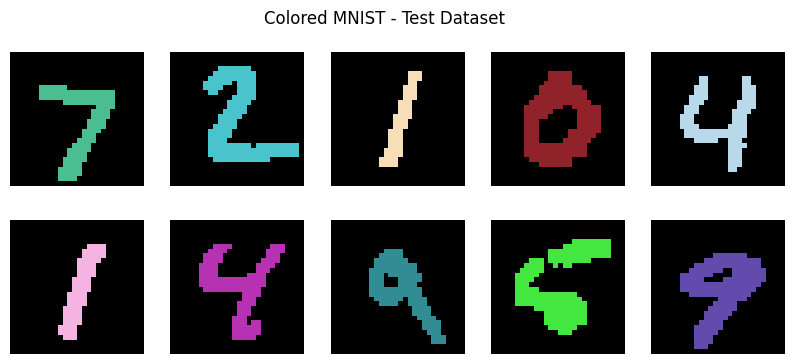

In [9]:
# Plot colored images from the training dataset
plotting_mnist_dataset(colored_X_train, 'Colored MNIST - Training Dataset')

# Plot colored images from the test dataset
plotting_mnist_dataset(colored_X_test, 'Colored MNIST - Test Dataset')

In [10]:
# Save colored datasets and labels
np.savez('colored_mnist_train.npz', images=colored_X_train, labels=y_train)
np.savez('colored_mnist_test.npz', images=colored_X_test, labels=y_test)

In [ ]:
# #  CODE TO Load the colored training dataset
# train_data = np.load('colored_mnist_train.npz')
# colored_X_train = train_data['images']
# y_train = train_data['labels']

# # Load the colored test dataset
# test_data = np.load('colored_mnist_test.npz')
# colored_X_test = test_data['images']
# y_test = test_data['labels']

### 2. Let's create the dataset where the digits are colored only R,G,B.

In [18]:
# Function to randomly colorize MNIST dataset with a single color channel
def random_colorize_rgb_mnist(X):
    colored_X = np.zeros((X.shape[0], X.shape[1], X.shape[2], 3), dtype=np.uint8)

    for i in range(X.shape[0]):
        img = X[i]

        # Generate random color channel index (0 for red, 1 for green, 2 for blue)
        color_channel_index = np.random.randint(0, 3)

        # Set the color based on the selected color channel
        color = [0, 0, 0]
        color[color_channel_index] = 255

        # Colorize the digits while keeping the background unchanged
        colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        colored_img[img > 0] = color
        colored_X[i] = colored_img

    return colored_X


In [19]:
colored_rgb_X_train = random_colorize_rgb_mnist(X_train)
colored_rgb_X_test = random_colorize_rgb_mnist(X_test)

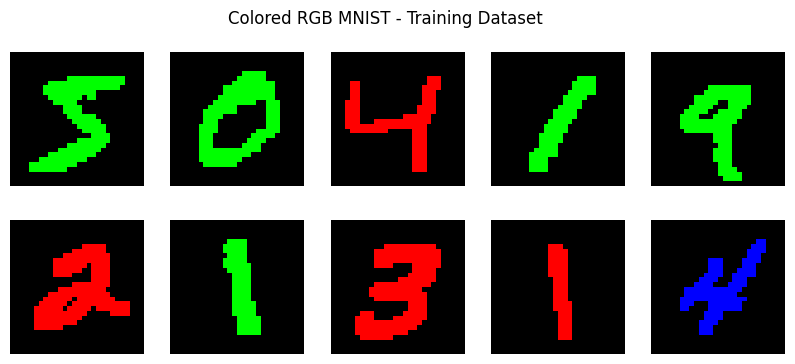

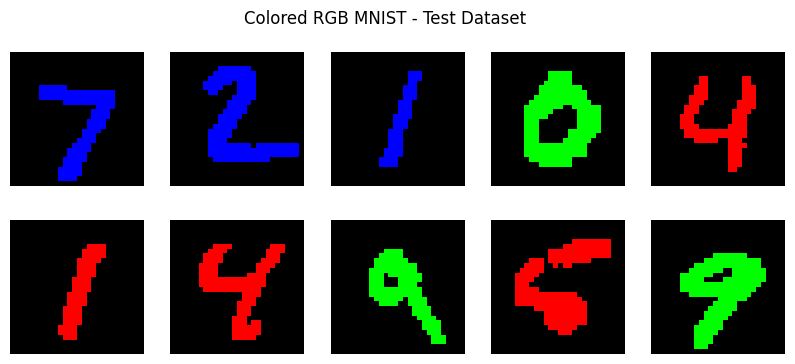

In [20]:
# Plot colored images from the training dataset
plotting_mnist_dataset(colored_rgb_X_train, 'Colored RGB MNIST - Training Dataset')

# Plot colored images from the test dataset
plotting_mnist_dataset(colored_rgb_X_test, 'Colored RGB MNIST - Test Dataset')

In [21]:
# Save colored datasets and labels
np.savez('colored_rgb_mnist_train.npz', images=colored_X_train, labels=y_train)
np.savez('colored_rgb_mnist_test.npz', images=colored_X_test, labels=y_test)